<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [34]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dossier = 'C:/Users/pierr/OneDrive/Documents/Projet/Projet_python/dvf_ensae_sbra/'

In [35]:
mutation = gpd.read_file("C:/Users/pierr/OneDrive/Documents/paris_muta_filo/paris_mutation_filo_service.shp")

In [36]:
def to_date_col(df, col= "datemut", formated= "%Y-%m-%d"):
    return pd.to_datetime(df[col], format= "%Y-%m-%d")

# paris_mutation["datemut"]= pd.to_datetime(paris_mutation["datemut"], format= "%Y-%m-%d")
mutation["datemut"]= to_date_col(mutation)

In [37]:
mutation["year"]= mutation["datemut"].apply(lambda x: x.year)

<AxesSubplot:xlabel='year', ylabel='valeurfonc'>

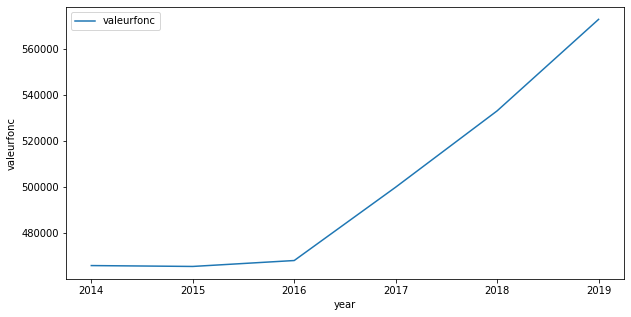

In [38]:
mutation1= mutation.copy()
mutation1= mutation1.groupby(["year"], as_index= False).mean()

fig = plt.subplots(1, 1, figsize= (10, 5))

sns.lineplot(data = mutation1, x = "year", y = "valeurfonc", label= "valeurfonc")

Nous allons faire l'approximation que la valeur foncière est linéaire par rapport à l'année de la mutation entre 2014 et 2016 ainsi qu'entre 2016 et 2019. Nous faisons également l'hypothèse que la variation de la valeur foncière par rapport à l'année est uniquement dû à l'inflation du prix de l'immobilier à Paris. Nous allons dans ce cadre réactualiser toutes les valeurs foncières à l'année 2016.

Nous récupérons d'un côté les mutations ayant eu lieu après 2016 et de l'autre celles ayant eu lieu avant 2016. 

In [39]:
mutationbefore2016 = mutation[mutation["year"]<=2016]
mutationbefore2016 = mutationbefore2016.dropna()
mutationafter2016 = mutation[mutation["year"]>=2016]
mutationafter2016 = mutationafter2016.dropna()

In [14]:
moyperyear = mutation2.groupby(["year"]).mean()

moyvalperyear = moyperyear['valeurfonc']

In [52]:
inflatafter2016 = (moyvalperyear[2019] - moyvalperyear[2016])/moyvalperyear[2016]
inflatbefore2016 = (moyvalperyear[2014] - moyvalperyear[2016])/moyvalperyear[2016]

In [55]:
def f(x) :
    if x["year"] in [2017, 2018, 2019] :
        return x["valeurfonc"] / (1 + inflatafter2016*(x["year"] - 2016)/3)
    else :
        return x["valeurfonc"] / (1 + inflatbefore2016*(2016 - x["year"])/2)

mutation["valfoncact2"] = mutation.apply(f, axis = 1)

<AxesSubplot:xlabel='year', ylabel='valfoncact2'>

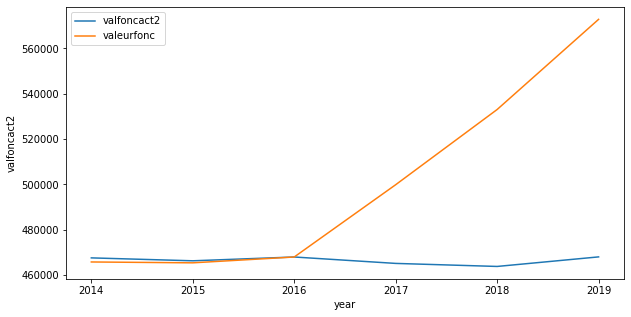

In [56]:
mutation2= mutation.copy()
mutation2= mutation2.groupby(["year"], as_index= False).mean()

fig = plt.subplots(1, 1, figsize= (10, 5))

sns.lineplot(data = mutation2, x = "year",  y = "valfoncact2", label= "valfoncact2")
sns.lineplot(data = mutation2, x = "year", y = "valeurfonc", label= "valeurfonc")